In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
sn.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
seg_df=pd.read_csv("segmentation data.csv")
segment_df=seg_df.drop("ID",axis=1)
segment_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [4]:
x_scaled=scaler.fit_transform(segment_df)
x_scaled.shape

(2000, 7)

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.80,random_state=64)

In [12]:
pca_df=pd.DataFrame(pca.fit_transform(x_scaled))
pca_df

,0,1,2
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909
...,...,...,...
1995,-0.866034,0.298330,1.438958
1996,-1.114957,0.794727,-1.079871
1997,-1.452298,-2.235937,0.896571
1998,-2.241453,0.627108,-0.530456


In [13]:
df_pca_comp = pd.DataFrame(data = pca.components_, columns =segment_df.columns.values, 
                          index = ['component_1', 'component_2', 'component_3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component_1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component_2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component_3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


Text(0.5, 1.0, 'Loadings')

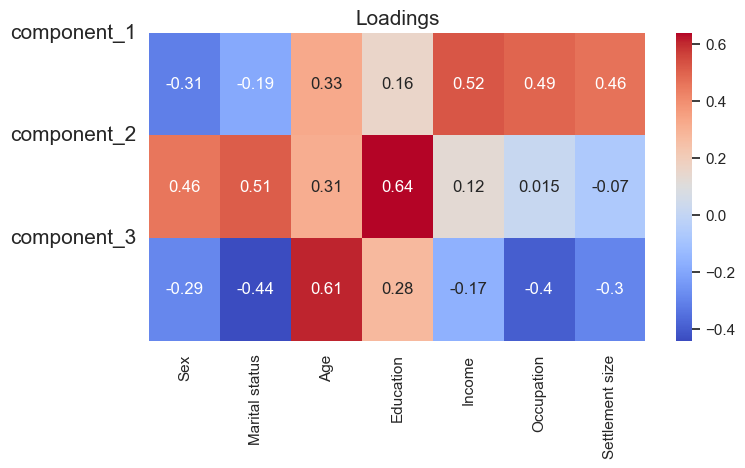

In [14]:
# Note that all fitted values are between [-1, 1], since the values are basically correlations , 
#meaning that the closer a result is to 0 the lower the loading of a variable onto a component.
plt.figure(figsize=(8,4))
sn.heatmap(df_pca_comp, cmap = 'coolwarm', annot = True)
plt.yticks([0,1,2], ['component_1', 'component_2', 'component_3'],rotation = 0, fontsize = 15 )
plt.title('Loadings',  fontsize = 15 )

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [16]:
svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(x_scaled)
svd_df=pd.DataFrame(A_transf)

In [17]:
tsne=TSNE(n_components=2,learning_rate=50,random_state=42)
tsne_df=tsne.fit_transform(x_scaled)

In [18]:
tsne_df=pd.DataFrame(tsne_df)
tsne_df

,0,1
0,21.026800,-4.479570
1,19.508488,43.585163
2,2.896699,-13.523245
3,39.637650,-5.133040
4,41.774689,-4.305818
...,...,...
1995,-20.523573,-14.676046
1996,-23.646503,35.535259
1997,-21.664087,-45.432247
1998,-48.828613,9.272585


# PCA data


Text(0, 0.5, 'WCSS')

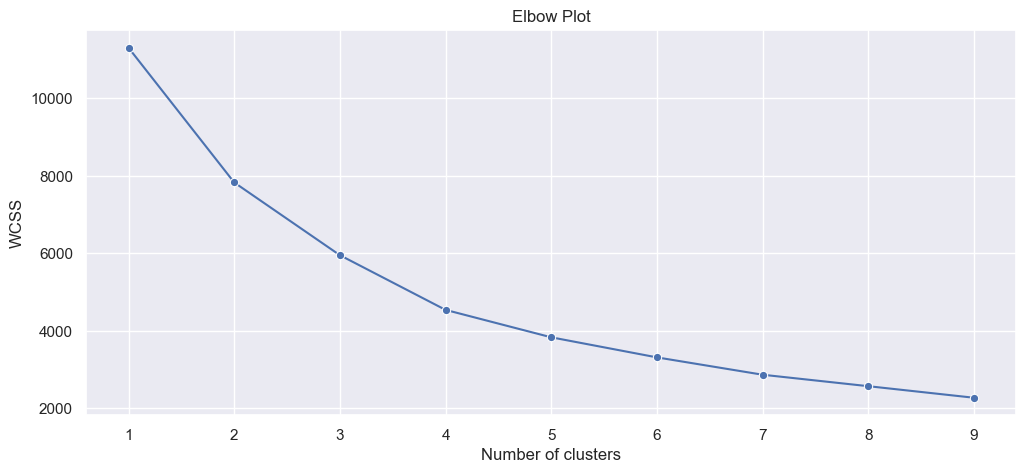

In [19]:
from sklearn.cluster import KMeans
#Finding optimal number of clusters
wcss=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(pca_df)
    iner=model.inertia_
    wcss.append(iner)

plt.figure(figsize=(12,5))
plt.title("Elbow Plot")
sn.lineplot(x=range(1,10),y=wcss,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [46]:
from sklearn.metrics import silhouette_score

In [20]:
from kneed import KneeLocator
x, y = list(range(1,10)), wcss
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

The optimal number of clusters, suggested by Elbow criterion:  4


In [53]:
range_n=[2,3,4,5,6,8,10,15]
for i in range_n:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    
    silhouttes=silhouette_score(pca_df,kmeans.labels_)
    print("For n_clusters={0} , the silghoutte score is {1}".format(i,silhouttes))

For n_clusters=2 , the silghoutte score is 0.3120127480968962
For n_clusters=3 , the silghoutte score is 0.34007202947451254
For n_clusters=4 , the silghoutte score is 0.3472736956747607
For n_clusters=5 , the silghoutte score is 0.34278169923062923
For n_clusters=6 , the silghoutte score is 0.349698759632316
For n_clusters=8 , the silghoutte score is 0.36172899193808855
For n_clusters=10 , the silghoutte score is 0.4058160037856438
For n_clusters=15 , the silghoutte score is 0.448074083199623


# SVD data

Text(0, 0.5, 'WCSS')

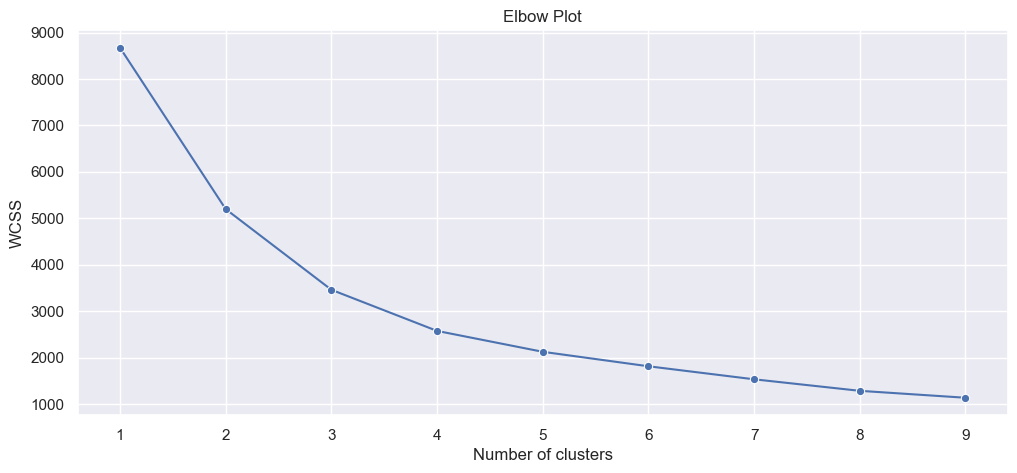

In [ ]:
from sklearn.cluster import KMeans
#Finding optimal number of clusters
wcss=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(svd_df)
    iner=model.inertia_
    wcss.append(iner)

plt.figure(figsize=(12,5))
plt.title("Elbow Plot")
sn.lineplot(x=range(1,10),y=wcss,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [ ]:
from kneed import KneeLocator
x, y = list(range(1,10)), wcss
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

The optimal number of clusters, suggested by Elbow criterion:  3


In [54]:
range_n=[2,3,4,5,6,8,10,15]
for i in range_n:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(svd_df)
    
    silhouttes=silhouette_score(pca_df,kmeans.labels_)
    print("For n_clusters={0} , the silghoutte score is {1}".format(i,silhouttes))

For n_clusters=2 , the silghoutte score is 0.3120736326949103
For n_clusters=3 , the silghoutte score is 0.3353348218050617
For n_clusters=4 , the silghoutte score is 0.3191346508614022
For n_clusters=5 , the silghoutte score is 0.2718298592330874
For n_clusters=6 , the silghoutte score is 0.29249879032981324
For n_clusters=8 , the silghoutte score is 0.29693115868362424
For n_clusters=10 , the silghoutte score is 0.29661710473448827
For n_clusters=15 , the silghoutte score is 0.294175905932898


# TSNE data

Text(0, 0.5, 'WCSS')

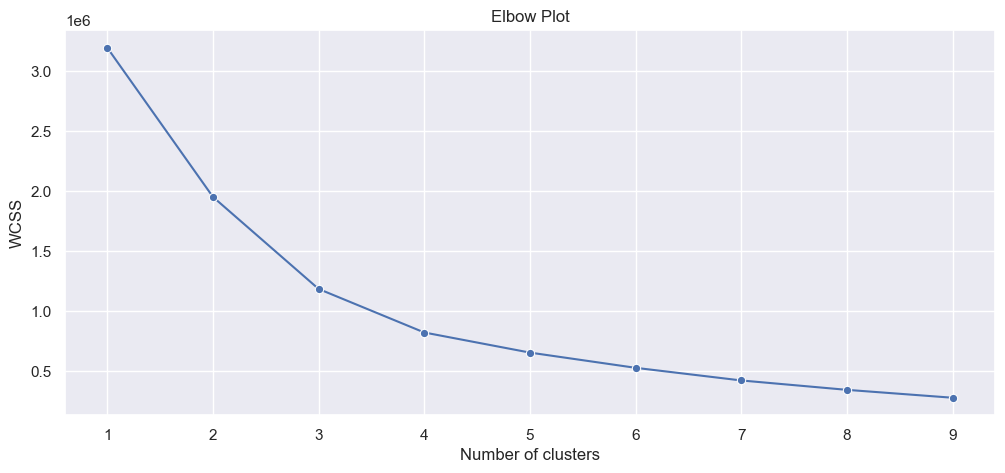

In [23]:
from sklearn.cluster import KMeans
#Finding optimal number of clusters
wcss=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(tsne_df)
    iner=model.inertia_
    wcss.append(iner)

plt.figure(figsize=(12,5))
plt.title("Elbow Plot")
sn.lineplot(x=range(1,10),y=wcss,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [24]:
from kneed import KneeLocator
x, y = list(range(1,10)), wcss
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

The optimal number of clusters, suggested by Elbow criterion:  3


In [55]:
range_n=[2,3,4,5,6,8,10,15]
for i in range_n:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(tsne_df)
    
    silhouttes=silhouette_score(pca_df,kmeans.labels_)
    print("For n_clusters={0} , the silghoutte score is {1}".format(i,silhouttes))

For n_clusters=2 , the silghoutte score is 0.30999792647668345
For n_clusters=3 , the silghoutte score is 0.22127157250812593
For n_clusters=4 , the silghoutte score is 0.18819992522893403
For n_clusters=5 , the silghoutte score is 0.19749935150895448
For n_clusters=6 , the silghoutte score is 0.20361790062187102
For n_clusters=8 , the silghoutte score is 0.20606891123162027
For n_clusters=10 , the silghoutte score is 0.23278310097969376
For n_clusters=15 , the silghoutte score is 0.2511513795599921


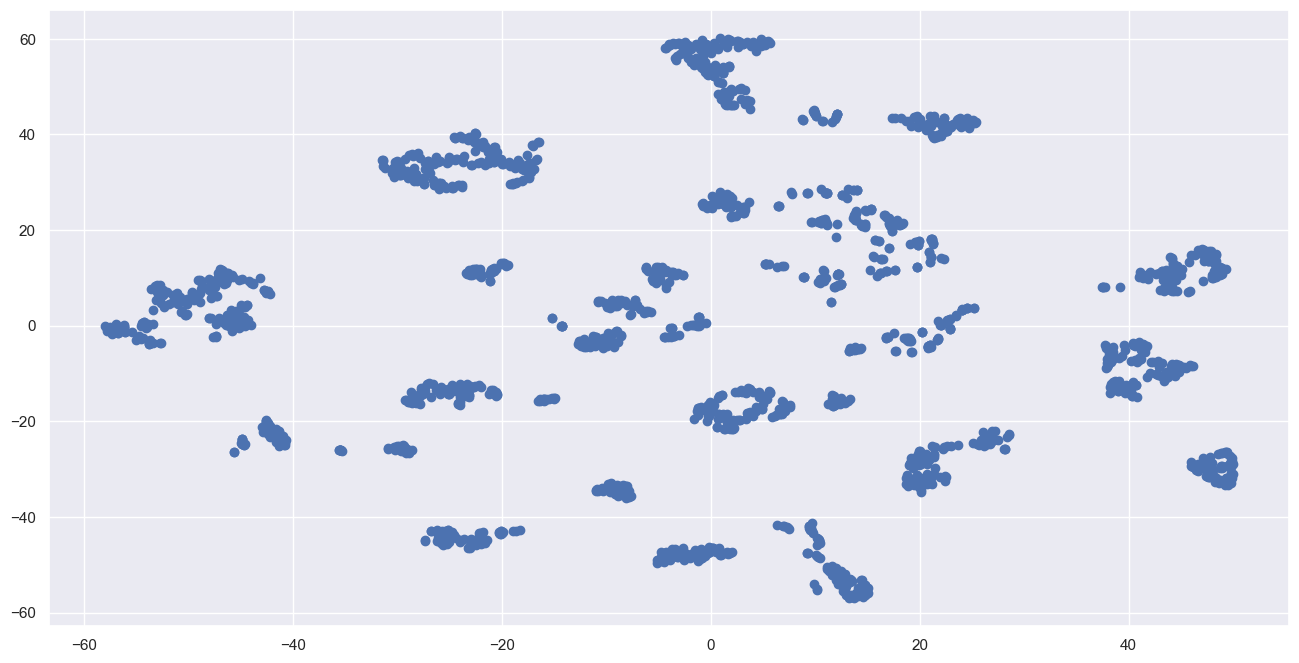

In [25]:
plt.figure(figsize=(16,8))
plt.scatter(tsne_df.iloc[:,0],tsne_df.iloc[:,1])
plt.show()

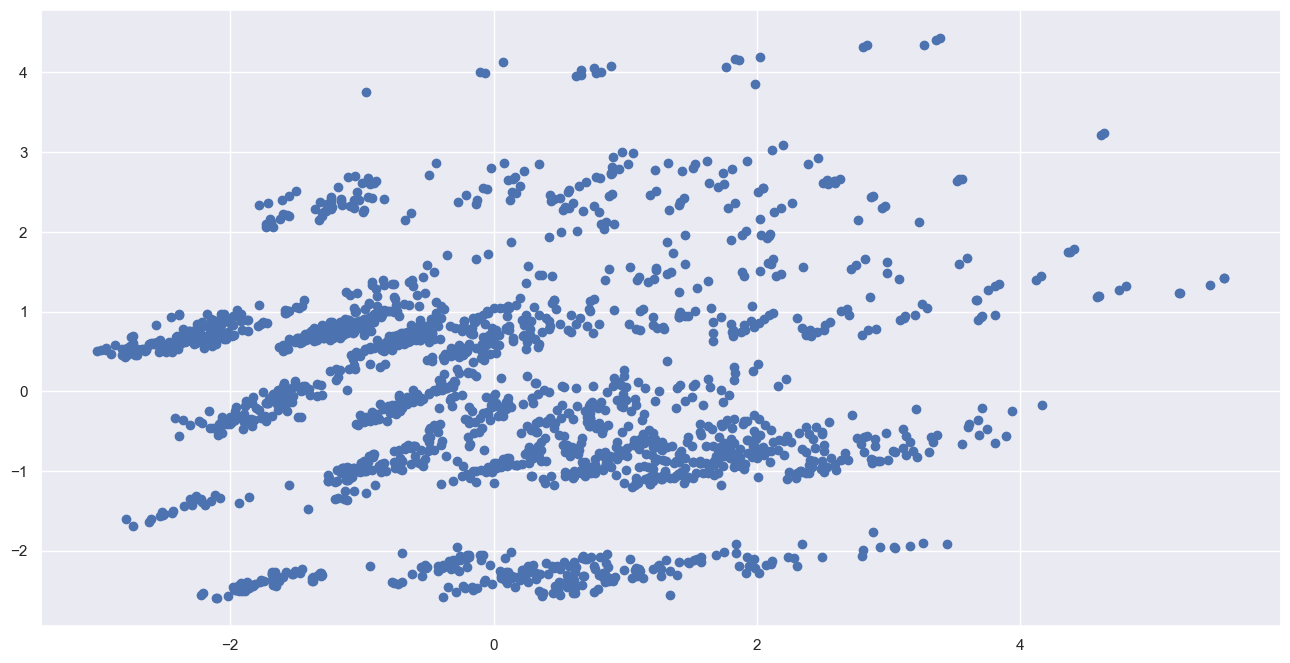

In [26]:
plt.figure(figsize=(16,8))
plt.scatter(svd_df.iloc[:,0],svd_df.iloc[:,1])
plt.show()

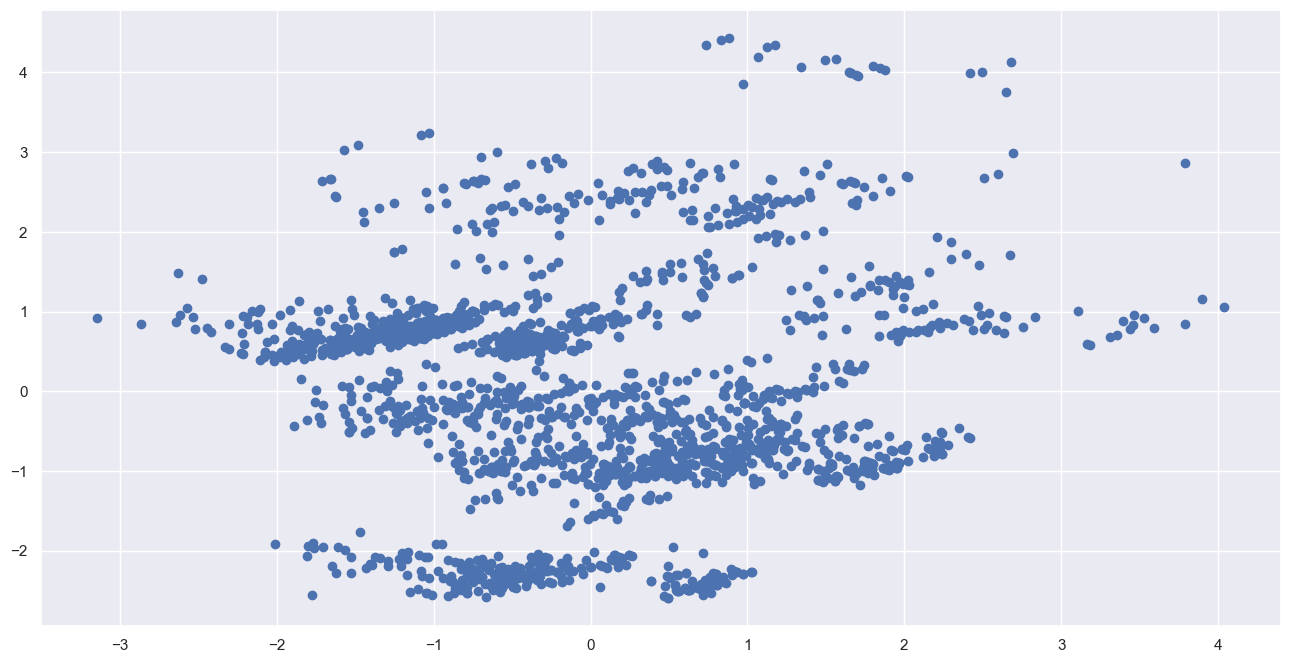

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(pca_df.iloc[:,2],pca_df.iloc[:,1])
plt.show()

In [39]:
model_kmeans=KMeans(n_clusters=4,random_state=42,max_iter=1000, tol=0.0001)
k_means_cluster=model_kmeans.fit_predict(pca_df)

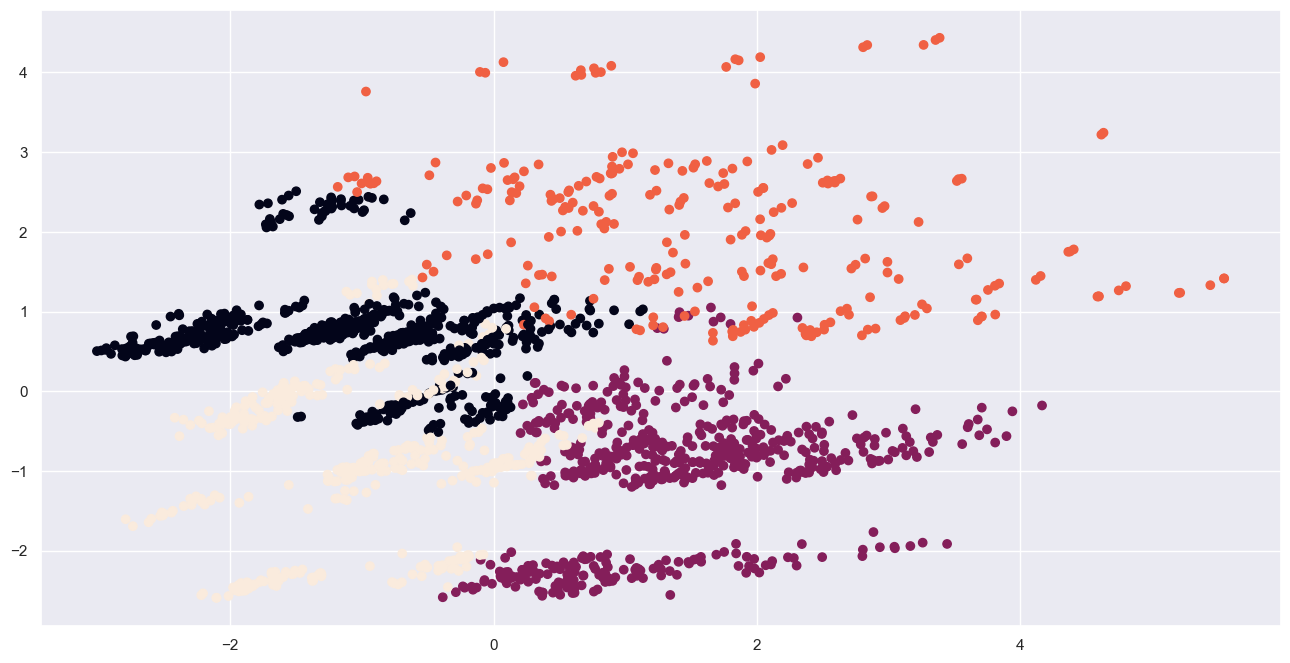

In [40]:
plt.figure(figsize=(16,8))
plt.scatter(pca_df.iloc[:,0],pca_df.iloc[:,1],c=k_means_cluster)
plt.show()

In [41]:
import pickle

In [42]:
# Scaler 
pickle.dump(scaler, open('scaler.pickle', 'wb'))
# PCA 
pickle.dump(pca, open('pca.pickle', 'wb'))
# KMeans PCA 
pickle.dump(model_kmeans, open('model_kmeans.pickle', 'wb'))

In [43]:
segment_df['clusters']=k_means_cluster

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def snake_plot(data, cluster_column):
    clusters = data[cluster_column].unique()
    
    # Set up the plot
    plt.figure(figsize=(10, 6))
    
    # Define a custom color palette
    colors = sns.color_palette("husl", n_colors=len(clusters))
    
    for i, cluster in enumerate(clusters):
        cluster_data = data[data[cluster_column] == cluster].drop(columns=[cluster_column])  # Exclude the cluster label column
        cluster_mean = cluster_data.mean()
        plt.plot(cluster_mean, label=f'Cluster {cluster}', marker='o', color=colors[i])
    
    # Customize the plot
    plt.title('Snake Plot')
    plt.xlabel('Features')
    plt.ylabel('Feature Values')
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()


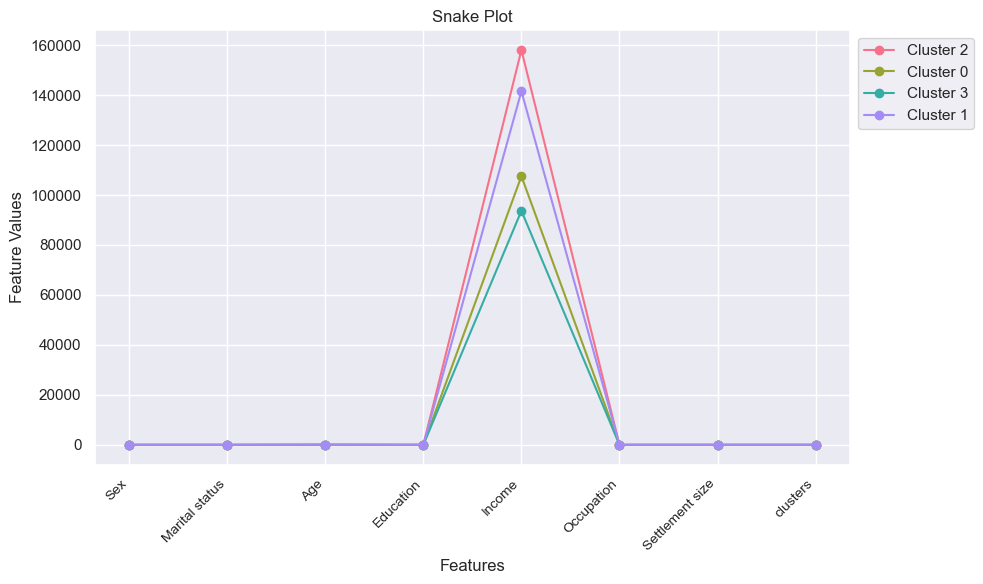

In [45]:
snake_plot(segment_df,'clusters')

In [57]:
model_svd_kmeans=KMeans(n_clusters=3,random_state=42,max_iter=1000, tol=0.0001)
svd_means_cluster=model_svd_kmeans.fit_predict(svd_df)

In [76]:
segment_df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'clusters', 'SVD Cluster'],
      dtype='object')

In [80]:
xSc=pd.DataFrame(x_scaled,columns=['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'])
xSc

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


In [78]:
xSc["SVD Cluster"]=svd_means_cluster.astype(int)

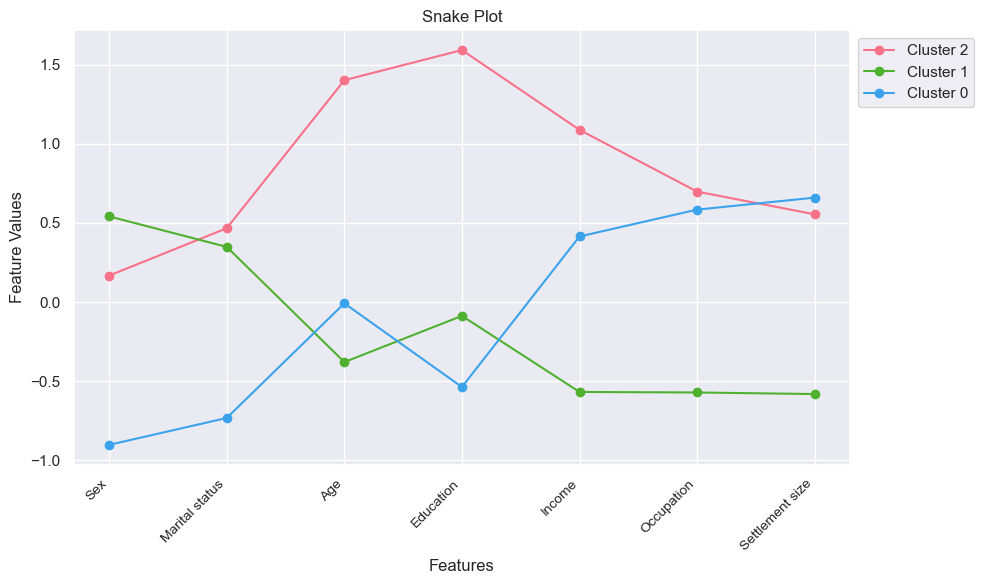

In [79]:
snake_plot(xSc,"SVD Cluster")

In [82]:
xSc['clusters']=k_means_cluster

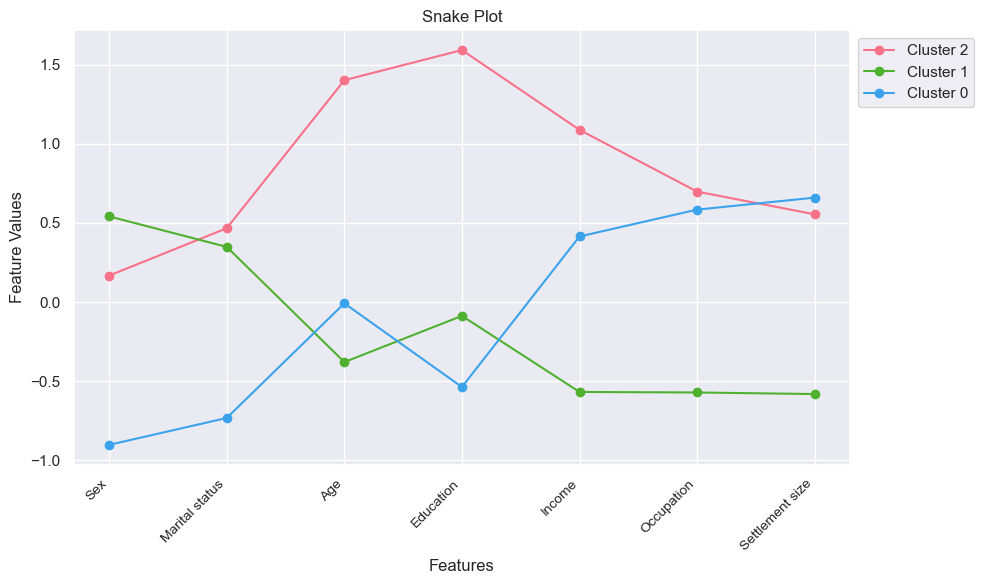

In [83]:
snake_plot(xSc,"clusters")